In [42]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#read the dataset and check the first five rows
df = pd.read_csv("popularity.csv", header = 0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [44]:
df.shape

(39644, 61)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [46]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [47]:
df[' shares'].quantile(0.78)

3100.0

In [48]:
df[' shares'].quantile(0.75)

2800.0

In [49]:
df[' shares'].quantile(0.8)

3400.0

In [81]:
df[' shares'].quantile(0.94)

9400.0

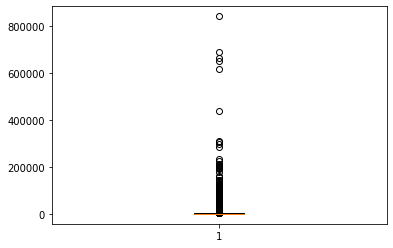

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [72]:
plt.boxplot(df[' shares'])
plt.show()
df[' shares'].describe()

In [70]:
df[df[' shares'] >30000]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
270,http://mashable.com/2013/01/11/deleted-scene-t...,727.0,13.0,140.0,0.786765,1.0,0.935897,2.0,1.0,0.0,...,0.100000,0.80,-0.400000,-0.6000,-0.200000,0.800000,-0.600000,0.300000,0.600000,37400
349,http://mashable.com/2013/01/13/snow-gadgets-toys/,725.0,11.0,416.0,0.547368,1.0,0.655039,22.0,1.0,11.0,...,0.100000,1.00,-0.166204,-0.1875,-0.155556,0.650000,0.350000,0.150000,0.350000,33100
410,http://mashable.com/2013/01/14/rha-sci-fi-short/,724.0,13.0,749.0,0.424528,1.0,0.613065,8.0,3.0,1.0,...,0.100000,1.00,-0.230556,-0.5000,-0.155556,0.166667,0.033333,0.333333,0.033333,39400
564,http://mashable.com/2013/01/16/reddit-most-bea...,722.0,12.0,171.0,0.666667,1.0,0.863636,4.0,1.0,2.0,...,0.433333,0.85,-0.200000,-0.2000,-0.200000,0.750000,0.675000,0.250000,0.675000,51900
969,http://mashable.com/2013/01/23/unlocking-cellp...,715.0,10.0,548.0,0.483333,1.0,0.677852,6.0,0.0,1.0,...,0.100000,0.60,-0.125000,-0.1250,-0.125000,0.500000,-0.500000,0.000000,0.500000,39200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,http://mashable.com/2014/12/17/guys-on-tinder/,20.0,9.0,517.0,0.506849,1.0,0.683502,9.0,7.0,9.0,...,0.136364,0.50,-0.279286,-0.4000,-0.071429,0.000000,0.000000,0.500000,0.000000,30200
39247,http://mashable.com/2014/12/19/east-london-dev...,17.0,13.0,605.0,0.513652,1.0,0.719653,4.0,0.0,2.0,...,0.062500,1.00,-0.181633,-0.6250,-0.050000,0.400000,-0.200000,0.100000,0.200000,39800
39322,http://mashable.com/2014/12/20/sony-crisis-spe...,16.0,13.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.500000,0.000000,44100
39476,http://mashable.com/2014/12/23/southwest-plane...,12.0,14.0,648.0,0.519873,1.0,0.693506,12.0,2.0,1.0,...,0.033333,1.00,-0.446296,-1.0000,-0.100000,0.666667,-0.700000,0.166667,0.700000,34500


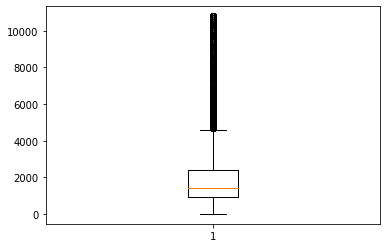

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [84]:
temp_data = df[df[' shares'] <= 10800]

plt.boxplot(temp_data[' shares'])
plt.show()
temp_data[' shares'].describe()

In [ ]:
inp1[inp1.Price > 30]

In [86]:
(37663/39644)*100

95.0030269397639